In [299]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
import mlflow

In [236]:
# Load California Housing dataset from sklearn
data = fetch_california_housing()

# Use just one feature ('MedInc' - Median Income) for simplicity
X = data.data[0:100, [0]]   # Feature matrix (2D)
y = data.target[0:100]         # Target values (house prices)

# Standardize the input feature for better model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(100, 1)


In [149]:
# class SimpleLinearModel(tf.keras.Model):
#     def __init__(self):
#         super(SimpleLinearModel, self).__init__()
#         self.dense = tf.keras.layers.Dense(units=1,
#                                           kernel_initializer=tf.keras.initializers.Constant(0.0),  # Set weight initializer
#                                            bias_initializer=tf.keras.initializers.Constant(0.0))   # Set bias initializer)

#     def call(self, inputs):
#         return self.dense(inputs)

In [279]:
# class WeightsHistory(tf.keras.callbacks.Callback):
#     def __init__(self):
#         self.weights = []
#         self.biases = []

#     def on_epoch_end(self, epoch, logs=None):
#         w, b = self.model.dense.get_weights()
#         self.weights.append(w[0][0])  # assuming single input feature
#         self.biases.append(b[0])
#         print(f"Epoch {epoch+1}: W={w[0][0]}, b={b[0]}")


class WeightsHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.weights = []
        self.biases = []

    def on_epoch_end(self, epoch, logs=None):
        dense_layer = self.model.layers[0]  # Assuming your model has only one Dense layer
        w, b = dense_layer.get_weights()
        self.weights.append(w[0][0])  # assuming single input feature
        self.biases.append(b[0])
        print(f"Epoch {epoch+1}: W={w[0][0]}, b={b[0]}")


In [315]:
# Instantiate the model
model = tf.keras.Sequential([
    layers.Dense(1,)
])

# Compile the model (specify loss and optimizer)
# model.compile(optimizer='sgd', loss='mse')
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='mse', metrics=['accuracy'])

weights_tracker = WeightsHistory()

# Fit the model on training data
model.fit(X_scaled, y, callbacks=[weights_tracker], batch_size=len(X_scaled), epochs=10)

    

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.0000e+00 - loss: 3.3292Epoch 1: W=1.2695602178573608, b=0.030350400134921074
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.0000e+00 - loss: 3.3292
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 3.2129Epoch 2: W=1.2539361715316772, b=0.06009379401803017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0000e+00 - loss: 3.2129
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 3.1011Epoch 3: W=1.2386246919631958, b=0.08924231678247452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 3.1011
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 2.9938Epoch 4: W=1.2236193418502808, b=0.11780787259340286
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0000e+00 - loss: 2.9938
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 2.8907Epoch 5: W=1.2089141607284546, b=0.1458021104335785

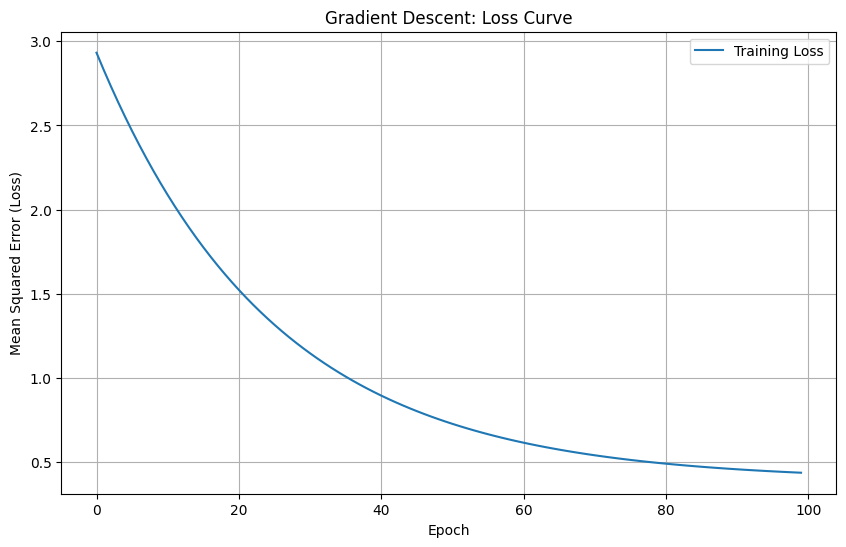

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Gradient Descent: Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.grid(True)
plt.legend()
plt.show()

In [293]:
model.save('models/linear_regression_model.keras')  # saves in SavedModel format

In [295]:
loaded_model = tf.keras.models.load_model('models/linear_regression_model.keras')

In [329]:
mlflow.set_experiment("First Experiment with Linear Regression Keras Model")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
# print(history.history)

with mlflow.start_run(run_name='New Run'):
    mlflow.log_metric("accuracy", history.history['loss'][-1])
    mlflow.log_param("learning_rate", model.optimizer.learning_rate.numpy())
    mlflow.log_param("epochs", history.epoch[-1] + 1)
    mlflow.log_param("batch_size", history.params.get("batch_size"))
    
    mlflow.tensorflow.log_model(model, "Linear Regression Model")

2025/04/16 04:41:10 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/04/16 04:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run New Run at: http://127.0.0.1:5000/#/experiments/179427657121934942/runs/2606bca45bec40c9a5e1dc5cbaa7b67f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/179427657121934942
